# Imports

In [124]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt

# Plot settings, open Excel document, Set labels

In [125]:
#Settings for plot
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 22})

#Get Excel File
book = xlrd.open_workbook('/home/liam/Documents/jpy/state_marriage_rates_90_95_99-16.xlsx')
sheet1 = book.sheet_by_index(0)

#Gathering labels for data
columnNames = sheet1.row_values(0)[1:]
rowNames = sheet1.col_values(0)[1:]

# Input Validation

In [126]:
def capitalizeThis(z):
    #List comes like this: z = [input1, input two]
    for n,x in enumerate(z):
            #Converts to: z = [Input1] or [Input Two]
            z[n] = capitalizeThis2(x.split(' '))
    return z

def capitalizeThis2(x):
    #x = [input1], or x = [input, two]
    s = " "
    
    #if z = [input, two]
    if len(x) > 1:
        
        #z = [Input, Two]
        for n,w in enumerate(x):
            x[n] = w.capitalize()
        
        #z = [Input Two], and s = "Input Two"
        s = s.join(x)
        return s
    else:
        #[Input] is now a string "Input"
        s = s.join(x)
        return (s.capitalize())

def lowerThis(z):
    #Converts each item in list z (user) into a lowercase string
    for n,x in enumerate(z):
        z[n] = x.lower()
    
    return z

def cleanList(z):
    clean = []
    #for each state
    for n,y in enumerate(rowNames):
        #if the lowercase spelling of the state exists in user input z, add it to list clean
        if y.lower() in z:
            clean.append(y.lower())
            
    return clean

# Calculations

In [132]:
#Returns each row of data excluding titles
def getAllRowData():
    rowList = []
    
    #Returns each state name
    for x in range(1, sheet1.nrows):
         rowList.append(sheet1.row_values(x)[1:])
            
    return rowList

#Returns one row of data excluding title
def getRowData(z):
    row = sheet1.row_values(z)[1:]
    return row

#Plots the data for each specified row
def plotRow(z):
    placeholderList = []
    #check each row name (states) and enumerate it
    for x,y in enumerate(rowNames):
        #Look for a match between user input item and row name (state)
        if y.lower() == z:
            #print(sheet1.row_values(x+1)[0:])
            plt.plot(columnNames, getRowData(x+1), linewidth=7)

# Request user input, call functions

In [128]:
#Request states or other input, run the code through the functions and plot the graph
def main():
    print ("Type one or more states to see their trend in marriage rates (like so: Texas, vermont, idaho)")
    print ('Type "raw" for all raw data')
    print ('Be wary of typing "Nevada", data seems extraneous')
    user = input("Type States: ").split(', ')
    
    #Filter input
    user = lowerThis(user)
    user = cleanList(user)
    
    #Adjustable Graph Size
    plt.rcParams["figure.figsize"] = ((12+len(user)),(8+len(user)))
    
    if user[0] == 'raw':
        #Basically prints the Excel sheet
        print(pd.DataFrame(getAllRowData(), columns = columnNames, index = rowNames))
    else:
        #Inserts user input one item at a time
        for z in user:
            plotRow(z)

        #Plots the legend, capitalizing first one item at a time from user input
        plt.legend(capitalizeThis(user)[0:])

# Test Code

Type one or more states to see their trend in marriage rates (like so: Texas, vermont, idaho)
Type "raw" for all raw data
Be wary of typing "Nevada", data seems extraneous
Type States: texas, asdf, New mexico


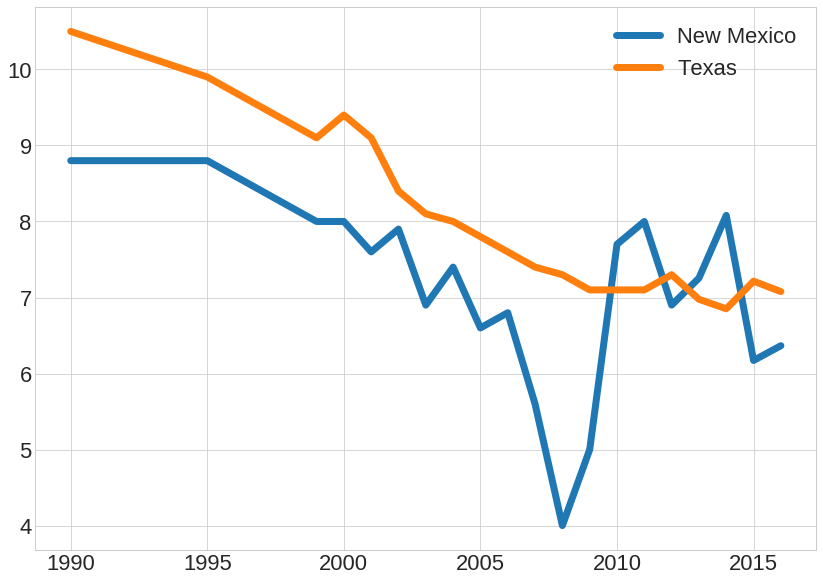

In [133]:
main()